In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings

warnings.filterwarnings('ignore')

In [2]:
# cargamos los datos en un dataframe
data = datasets.load_breast_cancer()
datos, clasif = datasets.load_breast_cancer(return_X_y = True)

print(data.keys())
print(data.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
X = datos
y = clasif

dat = pd.DataFrame(datos)
dat.columns=data.feature_names
print(dat.shape)
dat

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
dat.describe().T


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
# Este método de pandas da mucha información interesante...
dat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>],
       [<Axes: title={'center': 'mean compactness'}>,
        <Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>],
       [<Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>,
        <Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>],
       [<Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>,
        <Axes: title={'center': 'symmetry error'}>

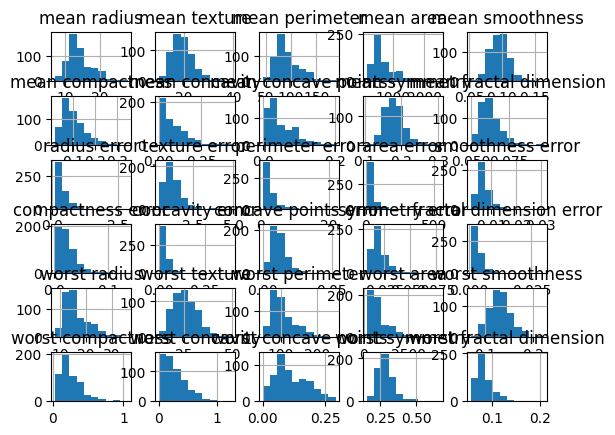

In [7]:
dat.hist()

In [8]:
data_df=dat.copy()
data_df.loc[:, 'class'] = clasif


class
0    212
1    357
dtype: int64


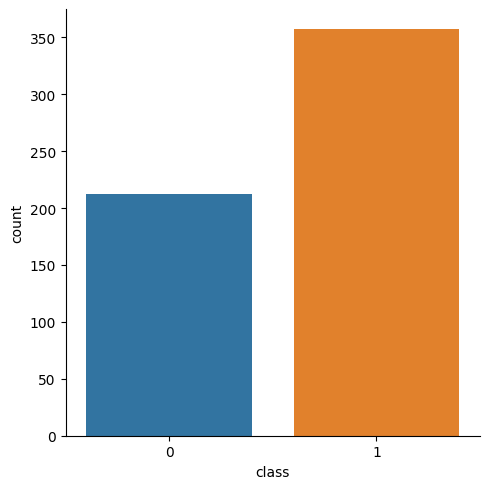

In [9]:
# miramos si hay balance de clase a predecir
sns.catplot(x='class', data = data_df, kind = 'count')
print(data_df.groupby('class').size())


In [10]:
# queremos saber si el dataframe tiene faltantes
print(dat.isnull().sum())


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [11]:
# vemos que tenemos datos de tipo numérico pero necesitamos etiquetarlos tipo onehot, es decir: 0 ó 1
# además, como tenemos valores que en una escala significan 'bien' o 'mal',
# tendremos que definir un umbral y reorganizar las variables en consecuencia
# supongamos que ese umbral es el valor medio (OJO!!!! esto es muy posible que no tenga ningún sentido médico)

data_ok = data_df.copy()
columns=list(data_ok.columns)

for col in columns[:-1]:       # creamos la columna 'categorica' y borramos la que ya no sirve
   data_ok[col+'_cat']=np.where(dat[col]<dat[col].mean(), 0, 1)
   data_ok.drop([col], axis=1, inplace=True)

data_ok


,class,mean radius_cat,mean texture_cat,mean perimeter_cat,mean area_cat,mean smoothness_cat,mean compactness_cat,mean concavity_cat,mean concave points_cat,mean symmetry_cat,...,worst radius_cat,worst texture_cat,worst perimeter_cat,worst area_cat,worst smoothness_cat,worst compactness_cat,worst concavity_cat,worst concave points_cat,worst symmetry_cat,worst fractal dimension_cat
0,0,1,0,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
1,0,1,0,1,1,0,0,0,1,1,...,1,0,1,1,0,0,0,1,0,1
2,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
3,0,0,1,0,0,1,1,1,1,1,...,0,1,0,0,1,1,1,1,1,1
4,0,1,0,1,1,1,1,1,1,0,...,1,0,1,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,0,1,1,0,0
565,0,1,1,1,1,1,0,1,1,0,...,1,1,1,1,0,0,1,1,0,0
566,0,1,1,1,1,0,0,1,1,0,...,1,1,1,1,0,1,1,1,0,0
567,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [12]:
# ahora vemos cómo plantear las reglas. Tenemos que hacer que busque asociaciones que coincidan con la presencia de cáncer de mama.
# Calculamos todas las asociaciones presentes
cancer = data_ok.loc[data_ok['class']==1]   # nos quedamos sólo con los registros que corresponden a 'maligno'
cancer.drop(['class'], inplace=True, axis=1)
print(cancer.shape)
cancer

(357, 30)


,mean radius_cat,mean texture_cat,mean perimeter_cat,mean area_cat,mean smoothness_cat,mean compactness_cat,mean concavity_cat,mean concave points_cat,mean symmetry_cat,mean fractal dimension_cat,...,worst radius_cat,worst texture_cat,worst perimeter_cat,worst area_cat,worst smoothness_cat,worst compactness_cat,worst concavity_cat,worst concave points_cat,worst symmetry_cat,worst fractal dimension_cat
19,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
20,0,0,0,0,1,1,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
21,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,1,1,1,1,0,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
559,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
560,0,1,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
561,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
frequent_items = apriori(cancer, use_colnames=True, min_support=0.1)
print(frequent_items.shape)
frequent_items

(377, 2)


,support,itemsets
0,0.128852,(mean radius_cat)
1,0.288515,(mean texture_cat)
2,0.123249,(mean perimeter_cat)
3,0.378151,(mean smoothness_cat)
4,0.210084,(mean compactness_cat)
...,...,...
372,0.106443,"(mean fractal dimension_cat, concavity error_c..."
373,0.103641,"(mean fractal dimension_cat, worst fractal dim..."
374,0.100840,"(concavity error_cat, concave points error_cat..."
375,0.112045,"(mean fractal dimension_cat, concavity error_c..."


In [26]:
reglas = association_rules(frequent_items, metric = 'lift')
#print(reglas.head())
print(reglas.shape)
print('TODAS LAS ASOCIACIONES ENCONTRADAS')
reglas_ordenadas=reglas.sort_values(['leverage'], ascending=False).reset_index(drop=True)
reglas_ordenadas

(2386, 10)
TODAS LAS ASOCIACIONES ENCONTRADAS


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(concavity error_cat),(compactness error_cat),0.232493,0.252101,0.198880,0.855422,3.393173,0.140268,5.172969,0.918937
1,(compactness error_cat),(concavity error_cat),0.252101,0.232493,0.198880,0.788889,3.393173,0.140268,3.635559,0.943029
2,(worst texture_cat),(mean texture_cat),0.302521,0.288515,0.224090,0.740741,2.567422,0.136808,2.744298,0.875301
3,(mean texture_cat),(worst texture_cat),0.288515,0.302521,0.224090,0.776699,2.567422,0.136808,3.123493,0.858071
4,(mean smoothness_cat),(worst smoothness_cat),0.378151,0.347339,0.266106,0.703704,2.025986,0.134760,2.202731,0.814367
...,...,...,...,...,...,...,...,...,...,...
2381,(worst symmetry_cat),(texture error_cat),0.308123,0.425770,0.126050,0.409091,0.960825,-0.005139,0.971773,-0.055650
2382,(symmetry error_cat),(worst texture_cat),0.397759,0.302521,0.106443,0.267606,0.884585,-0.013888,0.952327,-0.178068
2383,(worst texture_cat),(symmetry error_cat),0.302521,0.397759,0.106443,0.351852,0.884585,-0.013888,0.929172,-0.157585
2384,(mean fractal dimension_cat),(worst texture_cat),0.425770,0.302521,0.112045,0.263158,0.869883,-0.016760,0.946579,-0.206656


In [18]:
reglas_ordenadas['antecedents']

0         (concavity error_cat, worst compactness_cat, m...
1         (concavity error_cat, worst compactness_cat, m...
2         (mean compactness_cat, fractal dimension error...
3         (concavity error_cat, concave points error_cat...
4         (worst fractal dimension_cat, worst compactnes...
                                ...                        
125049    (worst fractal dimension_cat, mean fractal dim...
125050                                (mean smoothness_cat)
125051               (worst texture_cat, texture error_cat)
125052                                  (worst texture_cat)
125053           (symmetry error_cat, smoothness error_cat)
Name: antecedents, Length: 125054, dtype: object

In [19]:
reglas_ordenadas['antecedents'][0]

frozenset({'concavity error_cat',
           'mean concavity_cat',
           'worst compactness_cat',
           'worst fractal dimension_cat'})

In [22]:
reglas_ordenadas['consequents'][0]

frozenset({'concave points error_cat',
           'fractal dimension error_cat',
           'mean compactness_cat',
           'worst concavity_cat'})

In [23]:
reglas_ordenadas['consequents']


0         (mean compactness_cat, fractal dimension error...
1         (concave points error_cat, fractal dimension e...
2         (concavity error_cat, worst compactness_cat, m...
3         (worst fractal dimension_cat, worst compactnes...
4         (concavity error_cat, concave points error_cat...
                                ...                        
125049                                  (worst texture_cat)
125050               (worst texture_cat, texture error_cat)
125051                                (mean smoothness_cat)
125052           (symmetry error_cat, smoothness error_cat)
125053                                  (worst texture_cat)
Name: consequents, Length: 125054, dtype: object